# fastai approach

In [15]:
from fastcore.all import *
from fastai.vision.all import *
import pathlib

In [7]:
! source ~/.zshrc &&  wandb login $WANDB_KEY

wandb: Appending key for api.wandb.ai to your netrc file: /home/wiktor/.netrc


In [28]:
import wandb
wandb.init(project="phcd_numbers")

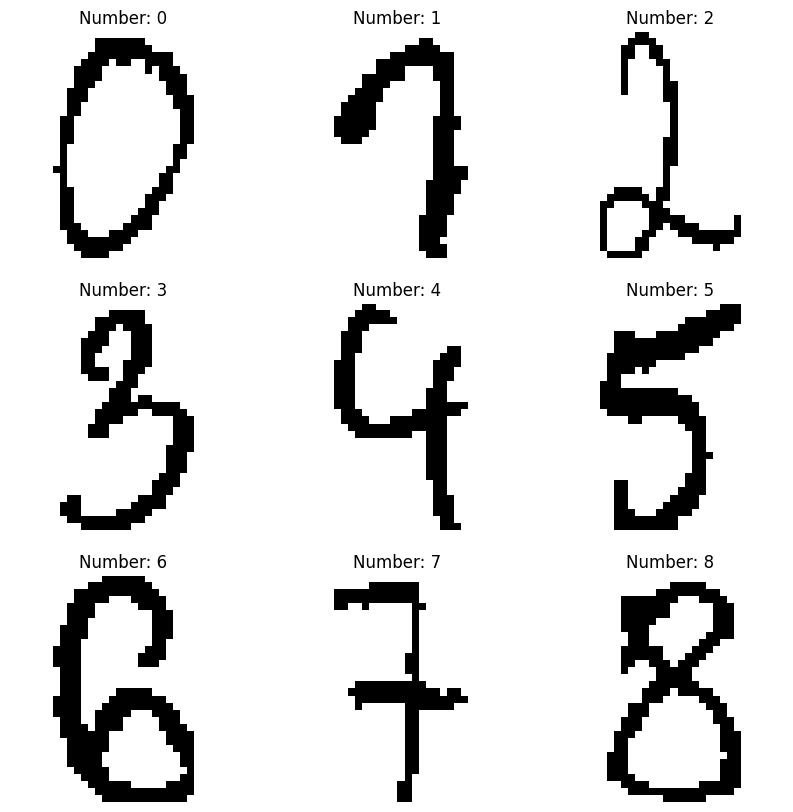

In [51]:
data_path = pathlib.Path("../data/numbers")


fig, axes = plt.subplots(3, 3, figsize=(10, 10))
axes = axes.flatten()

for i in range(9):
    ax = axes[i]
    img_path = list((data_path / str(i)).glob("*.png"))[0]
    im = Image.open(img_path)
    ax.imshow(im, cmap="gray")
    ax.set_title(f"Number: {i}")
    ax.axis("off")

plt.show()


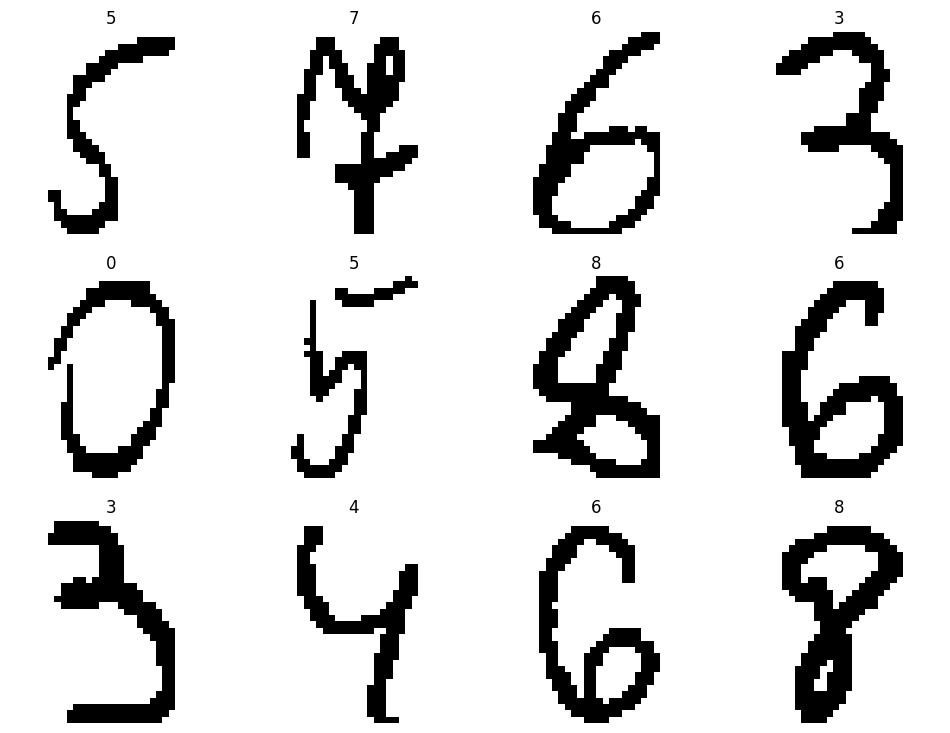

In [53]:
dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
).dataloaders(data_path, bs=32)

dls.show_batch(max_n=12)

In [54]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(3)

/home/wiktor/.pyenv/versions/3.10.5/envs/master-thesis/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  warnings.warn(
/home/wiktor/.pyenv/versions/3.10.5/envs/master-thesis/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /home/wiktor/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 51.2MB/s]


epoch,train_loss,valid_loss,error_rate,time
0,0.660479,0.442853,0.140157,04:00


epoch,train_loss,valid_loss,error_rate,time
0,0.120031,0.057132,0.015735,07:08
1,0.067864,0.032097,0.009003,07:07
2,0.025748,0.027001,0.007624,07:22


Predicted label: 7, Actual label: 7
Probability: 0.9992


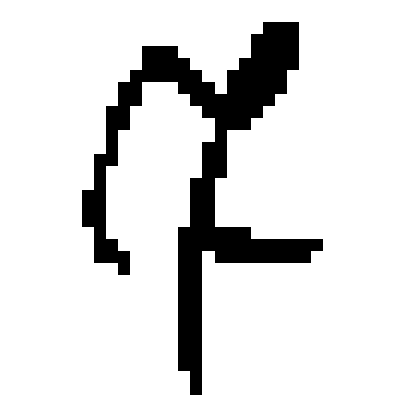

In [80]:
import numpy as np

data_path = pathlib.Path("../data/numbers")

i = np.random.randint(0, 10)
path = np.random.choice(list((data_path / str(i)).glob("*.png")))
prediction,_,probs = learn.predict(PILImage.create(path))
print(f"Predicted label: {prediction}, Actual label: {i}")
print(f"Probability: {probs[i]:.4f}")

fig, ax = plt.subplots(1, 1, figsize=(5, 5))

im = Image.open(path)
ax.imshow(im, cmap="gray")
ax.axis("off")

plt.show()

#